Euler Method
=======

# Theory

## Definition


### Algorithm


## Examples


# Implementation


## Imports

In [19]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters

In [64]:
# f = lambda t,x: -2*t*x

f = lambda t,x: np.sin(t)
analytic = lambda t: -np.cos(t) + 2 + np.cos(1)

## Algorithm


In [67]:
t = np.linspace(1,5, num=15)
dt = t[1] - t[0]

x = np.zeros_like(t)

x[0] = 2

for n in range(0, len(t)-1):
    x[n+1] = x[n] + dt*f(t[n], x[n])

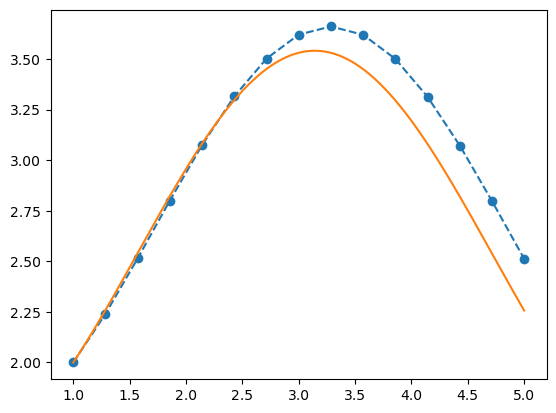

In [68]:
plt.plot(t, x, "o--")
plt.plot(np.linspace(1,5, num=500), analytic(np.linspace(1,5, num=500)))

plt.show()